Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Time Series Forecasting - Auto ARIMA

* Python Auto ARIMA: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [8]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error as mape, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
ts_df = pd.read_pickle('../crystal_ball/data_collector/structured_data/sales_ts.pkl')
print(ts_df.shape)

ts_df_train = ts_df.iloc[ts_df.index < '2015-03-01']
ts_df_test = ts_df.iloc[ts_df.index >= '2015-03-01']
print(ts_df_train.shape, ts_df_test.shape)

ts_df_train.head()

(942, 1)
(789, 1) (153, 1)


,Daily_Sales
Date,
2013-01-01,58165
2013-01-02,4822042
2013-01-03,4415571
2013-01-04,4587035
2013-01-05,4078281


In [3]:
def auto_arima_forecast(train_ts, test_ts, fitted_model, title):
    """
    Forecast and plot the train, test & forecasted time series.
    
    @param train_ts: the training time series data
    @param test_ts: the testing time series data
    @param fitted_model: the trained model
    @param title: the title of the plot
    @return: return the forecast performance results
    """
    y_pred = fitted_model.predict(len(test_ts))
    
    pred_mape = mape(test_ts, y_pred)
    pred_r2 = r2_score(test_ts, y_pred)
    
    plt.figure(figsize=(20,7))
    plt.plot(train_ts.index, train_ts, label='Train')
    plt.plot(test_ts.index, test_ts, label='Test')
    plt.plot(test_ts.index, y_pred, label='Forecast')
    plt.legend(loc='best')
    plt.title(f'{title} (MAPE: {pred_mape}, R2: {pred_r2})')
    plt.show()
    
    return pred_mape, pred_r2

### Forecast with Auto ARIMA

#### With Seasonal Settings

In [4]:
autoarima_model_s = pm.auto_arima(ts_df_train, 
                    start_p=1, start_q=1,
                    test='adf',  # use ADF test to find optimal 'd'
                    max_p=10, max_q=3,  # maximum p and q
                    m=7,  # the period for seasonal differencing
                    d=None,  # let model determine 'd'
                    seasonal=True,
                    start_P=0,
                    D=0,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(autoarima_model_s.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=25102.365, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=25227.957, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=25137.276, Time=0.83 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=25100.261, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=26488.905, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=25229.758, Time=0.22 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=25091.450, Time=2.04 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=25173.901, Time=0.86 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=24913.067, Time=3.40 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=25133.858, Time=2.76 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=24905.038, Time=5.06 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=24936.616, Time=3.40 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=24910.672, Time=4.37 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=8.69 sec
 ARIMA(0,0,2)(2,0,2)[7] i

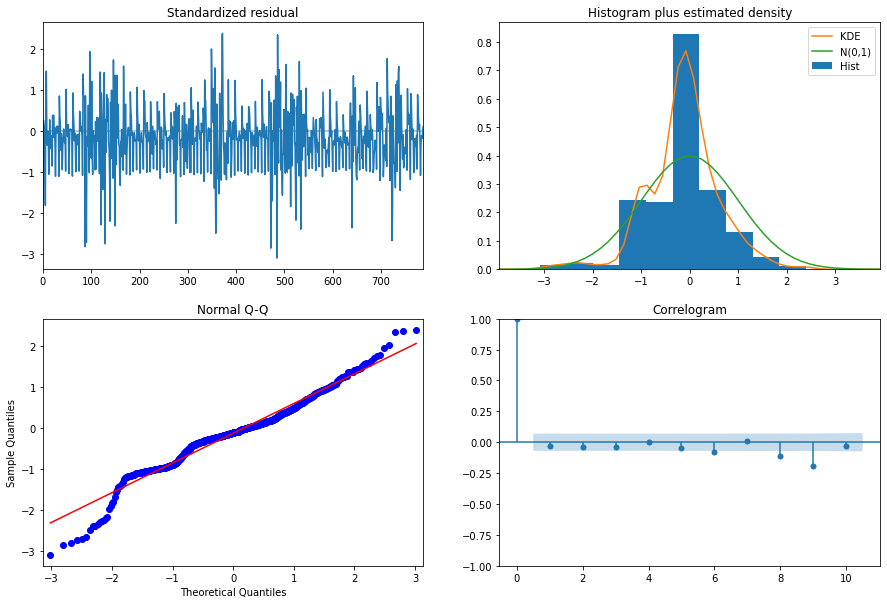

In [6]:
autoarima_model_s.plot_diagnostics(figsize=(15,10))
plt.show()

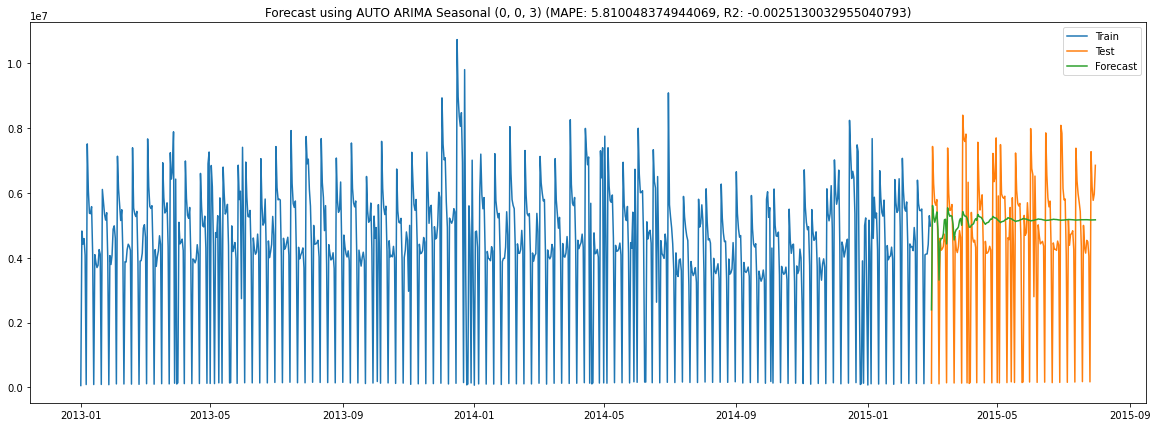

In [9]:
pred_mape_autoarima_s, pred_r2_autoarima_s = auto_arima_forecast(ts_df_train, ts_df_test, autoarima_model_s, title=f"Forecast using AUTO ARIMA Seasonal {autoarima_model_s.order}")

#### Without Seasonal Settings

In [10]:
autoarima_model = pm.auto_arima(ts_df_train, 
                    start_p=1, start_q=1,
                    test='adf',  # use ADF test to find optimal 'd'
                    max_p=10, max_q=3,  # maximum p and q
                    m=1,  # the period for seasonal differencing
                    d=None,  # let model determine 'd'
                    seasonal=False,
                    start_P=0,
                    D=0,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26488.905, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=25700.780, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=26165.558, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=25561.664, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=25450.916, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=25417.178, Time=0.15 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=25416.099, Time=0.17 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=25412.271, Time=0.28 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=25233.087, Time=1.93 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.46 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=24880.215, Time=1.01 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=24858.967, Time=1.45 sec
 ARIMA(8,0,0)(0,0,0)[0]             :

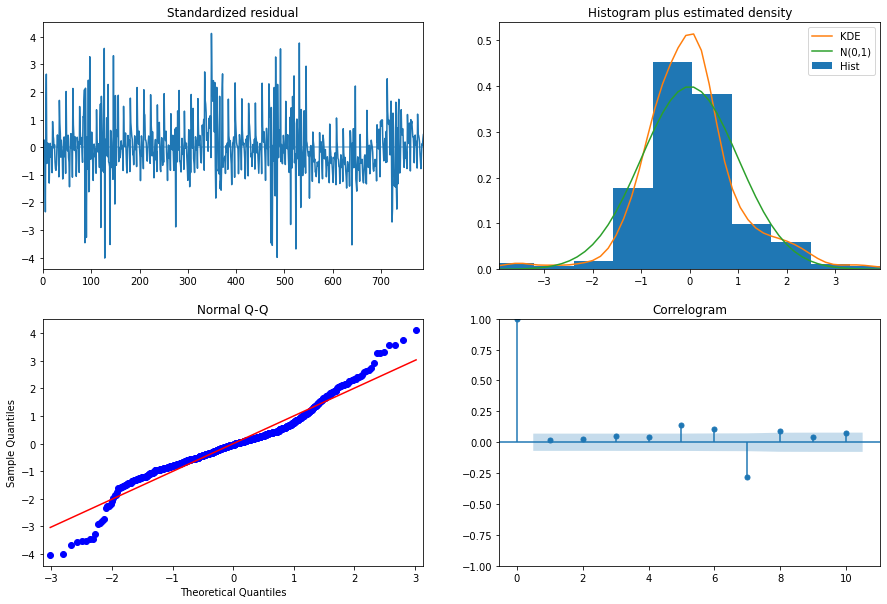

In [11]:
autoarima_model.plot_diagnostics(figsize=(15,10))
plt.show()

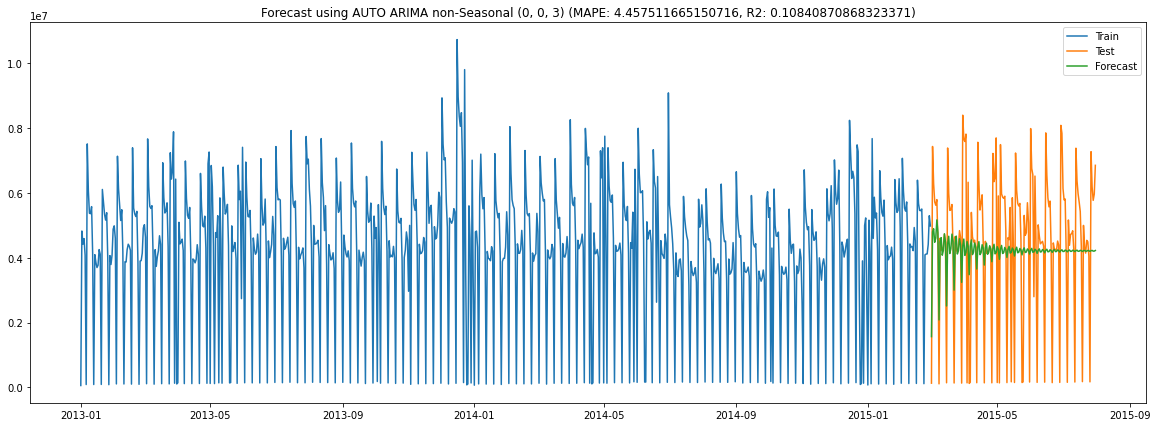

In [12]:
pred_mape_autoarima, pred_r2_autoarima = auto_arima_forecast(ts_df_train, ts_df_test, autoarima_model, title=f"Forecast using AUTO ARIMA non-Seasonal {autoarima_model_s.order}")